In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import sys
sys.path.append('../')

In [13]:
df = pd.read_csv('../../data/test_images_3072/train3_pixels.csv')
df

,x_start,y_start,x_end,y_end,long_start,long_end,lat_start,lat_end
0,0,0,4422,3072,-18.0,-0.726562,58.0,46.0
1,2048,0,5120,3072,-10.0,2.000000,58.0,46.0
2,4096,0,7168,3072,-2.0,10.000000,58.0,46.0
3,6144,0,9216,3072,6.0,18.000000,58.0,46.0


In [14]:
import numpy as np
ppm = 118 #m/pix
Rmoon = 1.737e6
mpd = np.pi*Rmoon/180 #m/deg
res = mpd/ppm #pix/deg
print(res)
print(3072/res)

256.91838226391104
11.957104715241387


<IPython.core.display.Javascript object>


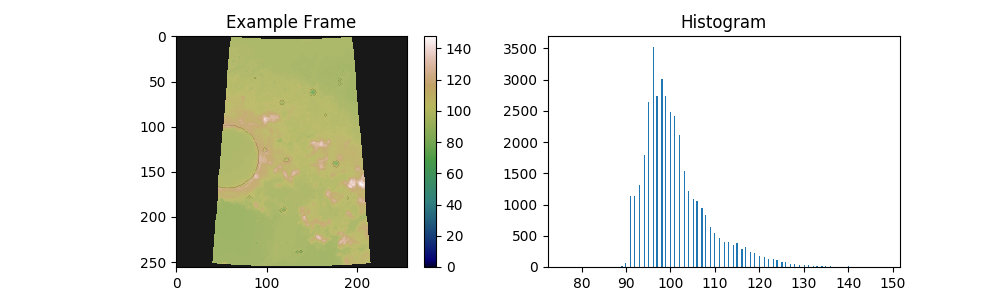

Number of unique values: 72


In [15]:
# show one example frmae: 
data_path = '../../data/test_images_3072/'
fn = data_path + 'train3'
example = h5py.File(fn + '_images.hdf5', 'r')
im_num=1

fig = plt.figure(figsize=[10, 3])
plt.subplot(1,2,1)
plt.title('Example Frame')
plt.imshow(example['input_images'][im_num], aspect="equal", cmap="gist_earth")
plt.colorbar()
plt.imshow(1-example['target_masks'][im_num], aspect="equal", cmap="gray", alpha=0.1)
plt.subplot(1,2,2)
img_arr = np.concatenate(example['input_images'][im_num])
plt.hist(img_arr[img_arr>0], 256);
plt.title('Histogram')
print('Number of unique values: {}'.format(len(np.unique(img_arr))))

In [7]:
# download albedo map: 
import os
data_path='../../data/'
if not os.path.isfile(data_path+'Clementine_albedo_simp750.jpg'): 
    !wget -P $data_path https://upload.wikimedia.org/wikipedia/commons/e/ea/Clementine_albedo_simp750.jpg
# if not os.path.isfile(data_path+'moonmercator.jpg'):
#     !wget -P $data_path http://btc.montana.edu/ceres/worlds/landform/moonmercator.jpg
albedo = Image.open(data_path + "/Clementine_albedo_simp750.jpg")

<IPython.core.display.Javascript object>


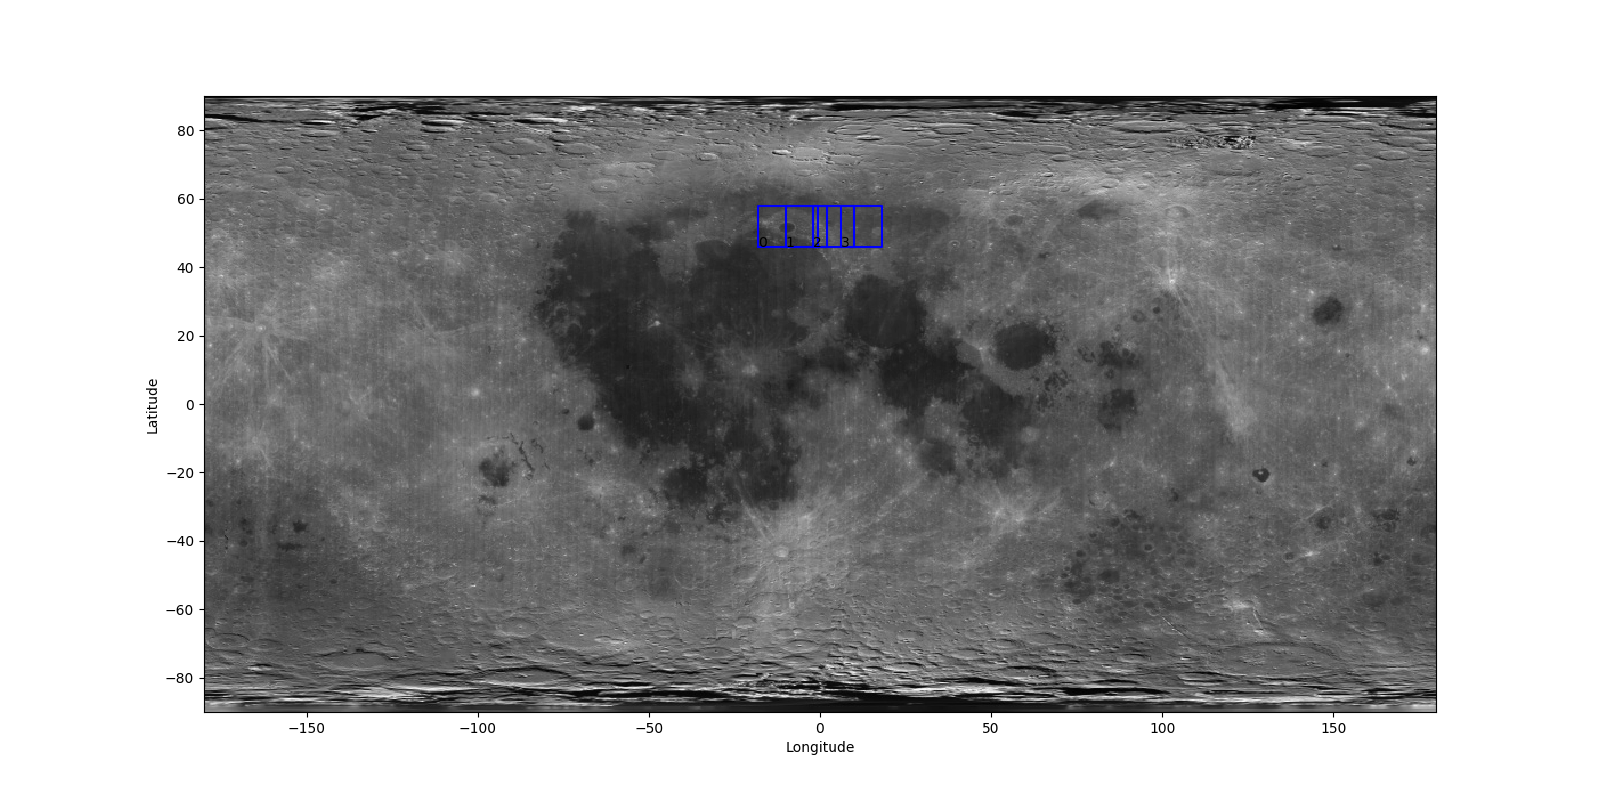

In [16]:
# See all frames of the set in global context: 
subset_list = np.arange(len(example['input_images'][:]))
fig = plt.figure(figsize=[16, 8])
dem_map = plt.imshow(albedo, extent=[-180,180,-90,90], aspect="equal", cmap="gray")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
for i in subset_list:
  llon,rlon,llat,ulat=example['longlat_bounds']['img_{:01d}'.format(i)][...]
  h1,=plt.plot([llon, llon, rlon, rlon, llon],[llat, ulat, ulat, llat, llat],'b')
  plt.text(llon,llat,str(i), color='k')

<IPython.core.display.Javascript object>


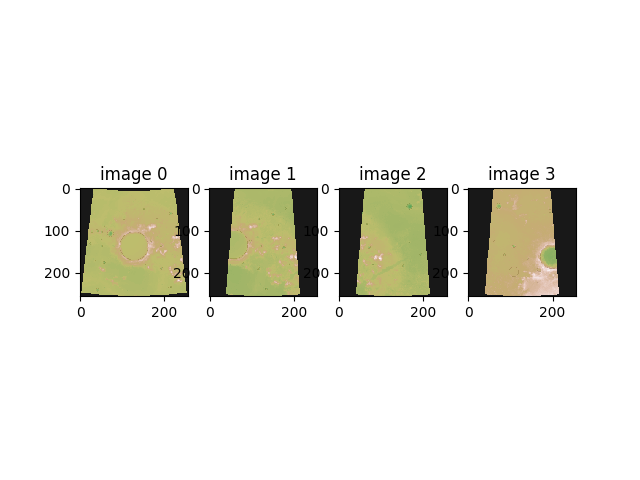

In [17]:
# from utils.maplot import plot_map_w_scalebar2
# figure
%matplotlib notebook
for num in subset_list:
    ax=plt.subplot(1,len(subset_list),num+1)
#     plot_map_w_scalebar2(ax,example,num,colorbar=True);
    plt.imshow(example['input_images'][num], aspect="equal", cmap="gist_earth")
    plt.imshow(1-example['target_masks'][num], aspect="equal", cmap="gray", alpha=0.1)
    plt.title('image {}'.format(num));

In [35]:
sys.path
from utils.maplot import plot_map_w_scalebar2

In [33]:
!pwd

/home/grosman/DLM-Project/analysis
